# Coût du travail et salaire net

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from openfisca_matplotlib import graphs
from __future__ import division

In [3]:
from datetime import date  # module nécessaire pour la définition des dates, dont notamment les dates de naissances
import openfisca_france    # module décrivant le système socio-fiscal français

TaxBenefitSystem = openfisca_france.FranceTaxBenefitSystem  # Initialisation de la classe décrivant le système socio-fiscal français
tax_benefit_system = TaxBenefitSystem()  # Création d'une instance du système socio-fiscal français 

In [4]:
year = 2010
period = "{}-01".format(year)
salaire_minimal = 1500
salaire_max = 8000

In [6]:
simulation = tax_benefit_system.new_scenario().init_single_entity(
    axes = [
        dict(
            count = 100,
            min = salaire_minimal,
            max = salaire_max,
            name = 'salaire_de_base',
            ),
        ],
    period = period,
    parent1 = dict(
        date_naissance = date(1980, 1, 1),
        categorie_salarie = 1,
        taille_entreprise = 2,
        exposition_accident = 2,
        allegement_fillon_mode_recouvrement =1,
        ),
    ).new_simulation()


## Salaires superbut, brut, net et revenu disponible

In [15]:
salaire_super_brut = simulation.calculate('salaire_super_brut', period = period)
salaire_brut = simulation.calculate('salaire_de_base', period = period)
salaire_net = simulation.calculate('salaire_net', period = period)
salaire_net_a_payer = simulation.calculate('salaire_net_a_payer', period = period)
salaire_imposable = simulation.calculate('salaire_imposable', period = period)
# TODO look at coût du travail etc there migh have been some changes

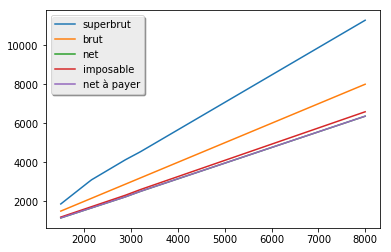

In [16]:
fig = plt.figure()
plt.plot(salaire_brut, salaire_super_brut, label = "superbrut")
plt.plot(salaire_brut, salaire_brut, label = "brut")
plt.plot(salaire_brut, salaire_net, label = "net")
plt.plot(salaire_brut, salaire_imposable, label = "imposable")
plt.plot(salaire_brut, salaire_net_a_payer, label = u"net à payer")
plt.legend(loc = 0, shadow=True, fancybox=True)

In [20]:
taux_salarie = 1 - salaire_net / salaire_brut  
taux_employeur = salaire_super_brut / salaire_brut - 1 

In [21]:
print (salaire_super_brut[:5] /salaire_brut[:5]) - 1
print salaire_super_brut[-5:]
print salaire_brut[-5:]
taux_employeur

[ 0.24349332  0.27060735  0.29550862  0.31846952  0.33972323]
[ 10910.18847656  11002.36523438  11094.52148438  11186.70800781  11278.875     ]
[ 7737.37353516  7803.03027344  7868.68701172  7934.34326172  8000.        ]


array([ 0.24349332,  0.27060735,  0.29550862,  0.31846952,  0.33972323,
        0.35942137,  0.37779069,  0.39490402,  0.41086185,  0.42594075,
        0.43858087,  0.43804502,  0.43753982,  0.43706298,  0.43662012,
        0.43618464,  0.4357872 ,  0.43540597,  0.43503964,  0.43469441,
        0.43436182,  0.43404782,  0.43086064,  0.42752552,  0.42433274,
        0.42126417,  0.4188261 ,  0.41852403,  0.41823387,  0.41796362,
        0.41769505,  0.4174335 ,  0.41718984,  0.41695225,  0.41672564,
        0.41650164,  0.4162854 ,  0.41607869,  0.41587389,  0.41567802,
        0.41549826,  0.41531456,  0.41513181,  0.41496158,  0.41479862,
        0.41463375,  0.41448045,  0.41432488,  0.41417575,  0.41403723,
        0.41389418,  0.41376543,  0.41362965,  0.41349769,  0.41337705,
        0.41324961,  0.41313529,  0.41301799,  0.41289973,  0.41278994,
        0.41268659,  0.41258025,  0.41247642,  0.41237485,  0.41227591,
        0.41218078,  0.4120878 ,  0.41199863,  0.41190946,  0.41

(0, 0.5)

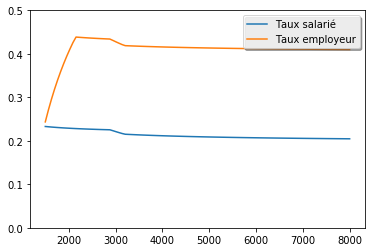

In [24]:
fig = plt.figure()
plt.plot(salaire_brut, taux_salarie, label = u"Taux salarié")
plt.plot(salaire_brut, taux_employeur, label = "Taux employeur")
plt.legend(loc = 0, shadow=True, fancybox=True)
plt.ylim([0,.5])

In [26]:
- simulation.calculate('cotisations_employeur', period = period) / simulation.calculate('salaire_de_base', period = period)

array([ 0.44649336,  0.44540724,  0.44440868,  0.44346961,  0.44262326,
        0.44182128,  0.4410907 ,  0.440404  ,  0.43976188,  0.43914086,
        0.4385809 ,  0.43804502,  0.43753985,  0.43706292,  0.43662012,
        0.43618467,  0.43578723,  0.43540597,  0.43503967,  0.43469444,
        0.43436188,  0.43404788,  0.43086058,  0.42752552,  0.42433286,
        0.42126414,  0.41882613,  0.41852403,  0.41823384,  0.41796362,
        0.41769502,  0.41743347,  0.41718987,  0.41695225,  0.4167257 ,
        0.4165017 ,  0.41628528,  0.41607869,  0.41587389,  0.41567811,
        0.41549829,  0.41531453,  0.41513178,  0.41496149,  0.41479862,
        0.41463378,  0.41448033,  0.41432485,  0.41417581,  0.41403729,
        0.41389427,  0.41376537,  0.41362971,  0.41349772,  0.41337705,
        0.41324961,  0.41313523,  0.4130179 ,  0.41289973,  0.41278997,
        0.41268659,  0.41258028,  0.41247636,  0.41237488,  0.41227582,
        0.41218072,  0.41208771,  0.41199851,  0.41190955,  0.41

In [28]:
- simulation.calculate('cotisations_employeur', period = period) / simulation.calculate('salaire_de_base', period = period)

array([ 0.44649336,  0.44540724,  0.44440868,  0.44346961,  0.44262326,
        0.44182128,  0.4410907 ,  0.440404  ,  0.43976188,  0.43914086,
        0.4385809 ,  0.43804502,  0.43753985,  0.43706292,  0.43662012,
        0.43618467,  0.43578723,  0.43540597,  0.43503967,  0.43469444,
        0.43436188,  0.43404788,  0.43086058,  0.42752552,  0.42433286,
        0.42126414,  0.41882613,  0.41852403,  0.41823384,  0.41796362,
        0.41769502,  0.41743347,  0.41718987,  0.41695225,  0.4167257 ,
        0.4165017 ,  0.41628528,  0.41607869,  0.41587389,  0.41567811,
        0.41549829,  0.41531453,  0.41513178,  0.41496149,  0.41479862,
        0.41463378,  0.41448033,  0.41432485,  0.41417581,  0.41403729,
        0.41389427,  0.41376537,  0.41362971,  0.41349772,  0.41337705,
        0.41324961,  0.41313523,  0.4130179 ,  0.41289973,  0.41278997,
        0.41268659,  0.41258028,  0.41247636,  0.41237488,  0.41227582,
        0.41218072,  0.41208771,  0.41199851,  0.41190955,  0.41